In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan=pd.read_csv('loan.csv')

In [3]:
pd.set_option('display.max_columns',150)
pd.set_option('display.max_rows',150)

In [4]:
loan.shape

(39786, 150)

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39786 entries, 0 to 39785
Columns: 150 entries, id to settlement_term
dtypes: float64(105), int64(17), object(28)
memory usage: 45.5+ MB


In [24]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,735,739,1,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-15,171.62,May-19,714,710,0.0,1,Individual,0,0.0,0,0.0,0.0,N,N
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,740,744,5,3,0,1687,9.40%,4,f,0,0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-13,119.66,Oct-16,499,0,0.0,1,Individual,0,0.0,0,0.0,0.0,N,N
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,735,739,2,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-14,649.91,Jun-17,739,735,0.0,1,Individual,0,0.0,0,0.0,0.0,N,N
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,690,694,1,10,0,5598,21%,37,f,0,0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-15,357.48,Apr-16,604,600,0.0,1,Individual,0,0.0,0,0.0,0.0,N,N
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,695,699,0,15,0,27783,53.90%,38,f,0,0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,Jan-17,67.30,Apr-18,684,680,0.0,1,Individual,0,0.0,0,0.0,0.0,N,N


In [6]:
loan.dtypes

id                                            float64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

# Missing Values

In [7]:
missing_vals=round((loan.isnull().sum()/loan.shape[0])*100,2).reset_index()

In [8]:
missing_vals.rename({'index':'Columns',0:'percentage'},axis=1,inplace=True)

In [9]:
missing_vals

,Columns,percentage
0,id,100.00
1,member_id,100.00
2,loan_amnt,0.00
3,funded_amnt,0.00
4,funded_amnt_inv,0.00
5,term,0.00
6,int_rate,0.00
7,installment,0.00
8,grade,0.00
9,sub_grade,0.00


### Removing features with more than 50% null values

In [18]:
missingvallist=list(missing_vals[missing_vals['percentage']>50.00]['Columns'].values)

In [19]:
print(missingvallist)

['id', 'member_id', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_

In [20]:
loan.drop(missingvallist,axis=1,inplace=True)

In [21]:
loan.shape

(39786, 58)

In [22]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_lie

In [23]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,735,739,1,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-15,171.62,May-19,714,710,0.0,1,Individual,0,0.0,0,0.0,0.0,N,N
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,740,744,5,3,0,1687,9.40%,4,f,0,0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-13,119.66,Oct-16,499,0,0.0,1,Individual,0,0.0,0,0.0,0.0,N,N
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,735,739,2,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-14,649.91,Jun-17,739,735,0.0,1,Individual,0,0.0,0,0.0,0.0,N,N
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,690,694,1,10,0,5598,21%,37,f,0,0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-15,357.48,Apr-16,604,600,0.0,1,Individual,0,0.0,0,0.0,0.0,N,N
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,695,699,0,15,0,27783,53.90%,38,f,0,0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,Jan-17,67.30,Apr-18,684,680,0.0,1,Individual,0,0.0,0,0.0,0.0,N,N


# Sample counts per label in loan_status 

Fully Paid     34116
Charged Off     5670
Name: loan_status, dtype: int64

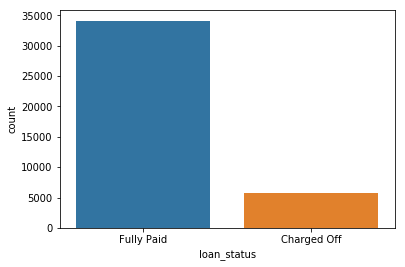

In [25]:
sns.countplot(loan['loan_status']);
loan['loan_status'].value_counts()

# Removing features which contains future info ie. irrelevant wrt problem statement

In [26]:
loan.drop(['url','desc','zip_code','funded_amnt','funded_amnt_inv','sub_grade','int_rate','emp_title','issue_d','out_prncp', 'out_prncp_inv','total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt','last_fico_range_high','last_fico_range_low','pymnt_plan','debt_settlement_flag'],axis=1,inplace=True)

In [28]:
list(loan.columns)

['loan_amnt',
 'term',
 'installment',
 'grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'loan_status',
 'purpose',
 'title',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens',
 'hardship_flag']

In [29]:
loan.shape

(39786, 34)

In [30]:
loan['fico_average']=(loan['fico_range_low']+loan['fico_range_high'])/2

In [31]:
## removing redundant columns 'fico_range_low','fico_range_high'

loan.drop(['fico_range_low','fico_range_high'],axis=1,inplace=True)

In [32]:
loan.shape

(39786, 33)

# Finding features which are having more than 1 unique values

In [51]:
new_loan = loan.loc[:,loan.apply(pd.Series.nunique) != 1]

In [52]:
new_loan.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies,fico_average
0,5000,36 months,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,May-19,0.0,737.0
1,2500,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,Oct-16,0.0,742.0
2,2400,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,Jun-17,0.0,737.0
3,10000,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,Apr-16,0.0,692.0
4,3000,60 months,67.79,B,1 year,RENT,80000.0,Source Verified,Fully Paid,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,Apr-18,0.0,697.0


In [53]:
new_loan.shape

(39786, 24)

In [54]:
for col in new_loan.columns:
    if (len(new_loan[col].unique()) < 4):
        print(new_loan[col].value_counts())
        print()

 36 months    29096
 60 months    10690
Name: term, dtype: int64

Not Verified       16926
Verified           12844
Source Verified    10016
Name: verification_status, dtype: int64

Fully Paid     34116
Charged Off     5670
Name: loan_status, dtype: int64



# Changing type of revol_util feature

In [55]:
new_loan['revol_util']=new_loan['revol_util'].str[:-1]

In [57]:
new_loan['revol_util']=new_loan['revol_util'].astype('float')

In [58]:
new_loan.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies,fico_average
0,5000,36 months,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,May-19,0.0,737.0
1,2500,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,Oct-16,0.0,742.0
2,2400,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,Jun-17,0.0,737.0
3,10000,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,Apr-16,0.0,692.0
4,3000,60 months,67.79,B,1 year,RENT,80000.0,Source Verified,Fully Paid,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,Apr-18,0.0,697.0


In [59]:
new_loan.dtypes

loan_amnt                 int64
term                     object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
loan_status              object
purpose                  object
title                    object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
total_acc                 int64
last_credit_pull_d       object
pub_rec_bankruptcies    float64
fico_average            float64
dtype: object

In [84]:
new_loan.columns

Index(['loan_amnt', 'term', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'fico_average'],
      dtype='object')

In [82]:
print('number of unique values in puprose: ',new_loan.purpose.nunique())
print('numver of unique values in title: ',new_loan.title.nunique())

number of unique values in puprose:  14
numver of unique values in title:  19633


## purpsose and title are giving same info. We are dropping title feature

In [86]:
new_loan.drop('title',axis=1,inplace=True)
new_loan.shape

(39786, 23)

## Missing values

In [87]:
a=round((new_loan.isnull().sum()/new_loan.shape[0])*100,2).reset_index()
a.rename({'index':'features',0:'null_value %'},axis=1,inplace=True)
a[a.iloc[:,1]>0.0]

,features,null_value %
4,emp_length,2.71
18,revol_util,0.13
20,last_credit_pull_d,0.01
21,pub_rec_bankruptcies,1.75


#### 1. pub_rec_bankruptcies

In [88]:
new_loan['pub_rec_bankruptcies'].value_counts()

0.0    37404
1.0     1678
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [89]:
new_loan['pub_rec_bankruptcies'].fillna(0,inplace=True)

#### 2. last_credit_pull_d --> future info

In [90]:
new_loan.drop(['last_credit_pull_d'],axis=1,inplace=True)

#### 3.revol_util

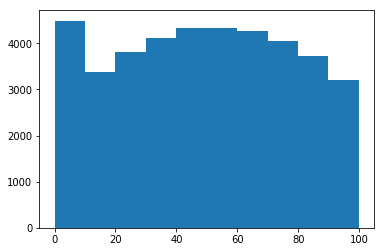

In [93]:
plt.hist(new_loan['revol_util']);

In [94]:
new_loan['revol_util'].describe()

count    39736.000000
mean        48.858123
std         28.336631
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

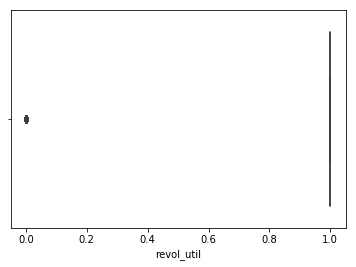

In [95]:
sns.boxplot(~new_loan['revol_util'].isnull())
plt.show()

In [96]:
new_loan['revol_util'].nunique()

1089

In [97]:
import math
new_loan['revol_util'].mode()

0    0.0
dtype: float64

In [98]:
new_loan['revol_util'].median()

49.3

In [99]:
## filling with mode
new_loan['revol_util'].fillna(0,inplace=True)

#### removing rows with null values beacuse no pattern found for emp_length

In [100]:
new_loan.dropna(axis=0,inplace=True)

In [101]:
b=round((new_loan.isnull().sum()/new_loan.shape[0])*100,2).reset_index()
b.rename({'index':'features',0:'null_value %'},axis=1,inplace=True)
b[b.iloc[:,1]>0.0]

,features,null_value %


In [102]:
new_loan.shape

(38708, 22)

In [103]:
new_loan.dtypes.value_counts()

object     9
int64      7
float64    6
dtype: int64

In [104]:
new_loan.columns

Index(['loan_amnt', 'term', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'pub_rec_bankruptcies', 'fico_average'],
      dtype='object')

In [106]:
new_loan['addr_state'].nunique()

50

In [107]:
new_loan['addr_state'].value_counts()

CA    6917
NY    3713
FL    2782
TX    2679
NJ    1830
IL    1488
PA    1485
VA    1379
GA    1358
MA    1314
OH    1193
MD    1036
AZ     836
WA     807
CO     770
NC     762
CT     734
MI     688
MO     662
MN     594
NV     483
SC     464
WI     446
OR     437
AL     434
LA     426
KY     323
OK     294
KS     261
UT     253
AR     236
DC     214
RI     197
NM     184
HI     170
WV     168
NH     162
DE     111
MT      79
WY      79
AK      79
SD      63
VT      54
MS      19
TN      17
IN       9
ID       6
NE       5
IA       5
ME       3
Name: addr_state, dtype: int64

In [108]:
new_loan.nunique()

loan_amnt                 880
term                        2
installment             15170
grade                       7
emp_length                 11
home_ownership              5
annual_inc               5105
verification_status         3
loan_status                 2
purpose                    14
addr_state                 50
dti                      2863
delinq_2yrs                11
earliest_cr_line          515
inq_last_6mths              9
open_acc                   40
pub_rec                     5
revol_bal               21462
revol_util               1087
total_acc                  82
pub_rec_bankruptcies        3
fico_average               36
dtype: int64

# Removing addr_state feature beacuse it will add 49 features while creating dummies

In [109]:
new_loan.drop('addr_state',axis=1,inplace=True)

# redundant feature --> 'earliest_cr_line'

In [110]:
new_loan.drop('earliest_cr_line',axis=1,inplace=True)

In [111]:
new_loan.shape

(38708, 20)

In [112]:
new_loan.to_csv('cleaned_data.csv',index=False)